<a href="https://colab.research.google.com/github/xanasa14/Finances/blob/main/DownloadingDataYahooFinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install yahoofinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.14-py3-none-any.whl size=28627 sha256=e936babdfe66261087a794ac026b24a125d186b68b9f5a5b9d8495ab37e9a1cd
  Stored in directory: /root/.cache/pip/wheels/32/a3/b6/b5b33187f2d42f095fecc236b957b46173fa09e78a106e309f
Successfully built yahoofinancials


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
from yahoofinancials import YahooFinancials

In [3]:
#companies = ['TSLA',"AMZN",'WMT','GOOG',"WEN","TGT",'T','TMUS', 'VZ','CTSH',"ACN"]
startDate = "2021-10-01"
#endDate = "2021-12-27"
companies = [             
'MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AAP', 'AMD', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB',

'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL',  'GOOGL', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 
'AMGN', 'APH', 'ADI', 'ANSS', 'AON','APA', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB',
 'AVY',
'BKR', 'BAC', 'BAX', 'BDX', 'BBY', 'BIO', 'BIIB','BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'CHRW', 'CDNS', 
'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'LUMN','CF','SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 
'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CME', 'CMS', 'KO', 'CTSH','CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CPRT', 
'GLW', 'COST', 'COTY', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN','DXCM','FANG','DLR', 'DFS', 
'T','DISH', 'DG', 'DLTR', 'D', 'DPZ', 'DOV','DTE', 'DUK', 'DRE', 'DD', 'DXC', 'EMN', 'ETN', 'EBAY','ECL','EIX','EW','EA','EMR', 'ETR', 'EOG', 
'EFX', 'FFIV', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FRC', 'FE', 'FISV', 'FLT', 'FLS', 'FMC', 'F', 'FTNT', 'FTV', 'FBHS', 'BEN', 
'FCX', 'GPS', 'GRMN','IT', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GL', 'GS', 'GWW', 'H', 'HAL', 'HBI', 'HIG', 'HAS', 'HCA', 'PEAK', 
'HSIC', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HRL', 'HST', 'HWM', 'HPQ', 'HUM', 'HBAN', 'HII', 'IEX', 'IDXX', 'ITW', 'ILMN', 'INCY', 
'TT', 'INTC', 'IP', 'IPG', 'INT', 'ISRG', 'IVZ', 'IPGP', 'IQV', 'IRM', 'JBHT', 'JKHY', 'J', 'SJM', 'JCI', 'JPM', 'JNPR','K','KEY','LW','LVS',
'LEG', 'LDOS', 'LEN', 'LLY', 'LNC', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LYB', 'M', 'MRO', 'MPC','MKTX','MAR','MMC','MLM', 'MAS', 'MA', 'MKC', 
'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MGM', 'MCHP', 'M', 'MSFT', 'MAA', 'NOC', 'NCLH', 
'NRG', 'NUE', 'NVDA', 'NVR', 'ORLY',
'OXY','ODFL','OMC','OKE','ORCL', 'PCAR', 'PKG', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PNR', 'PEP', 'PKI','PRGO','PFE','PM','PSX','PNW','PXD', 
'PNC','PPG','PPL','PFG','PG','PGR','PLD','PEG','PSA','PHM','PVH','QRVO','QCOM','PWR', 'DGX', 'RL', 'RJF', 'SLG', 'SNA', 'SO','LUV','SWK','SBUX',
'STT','STE','SYK','SIVB','SYF','SNPS','SYY','TMUS','TROW','TTWO', 'TPR', 'TGT', 'TEL', 'FTI','TDY','TFX','TXN','TXT','TDG','TFC','TWTR','TYL',
'TSN', 'USB', 'UDR', 'UL', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UHS', 'UNM', 'VLO', 'VTR', 'VRSN','VRSK','VZ','VRTX','VFC','V','VNO', 
'VMC', 'WRB', 'WAB', 'WBA', 'WMT', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC', 'W', 'WY', 'WHR', 'WMB', 'WYNN', 'XEL', 'TSLA', 'AAPL',
'XRX', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION', 'ZTS','NFLX'

]

finalData=pd.DataFrame()
for company in companies:
  df = yf.download(company, 
                      start=startDate, 
                      #end=endDate, 
                      progress=False)
  df = df.drop(columns=['Open', 'High','Low', 'Volume',"Close"])
  df = df.rename(columns={'Adj Close': company})
  tmp = df[str(company)]

  finalData = finalData.append(tmp, ignore_index=True)
finalData
finalData = finalData.T # or df2.transpose()
for i in range(len(companies)):
  finalData = finalData.rename(columns={i: companies[i]})




finalData['Date'] = finalData.index
col_name="Date"
first_col = finalData.pop(col_name)
finalData.insert(0, col_name, first_col)
finalData.to_csv('/content/drive/MyDrive/YahooData/YahooFinanceData.csv', index = False, header=True)
finalData

<ipython-input-3-5f4e982a5b15>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalData = finalData.append(tmp, ignore_index=True)
<ipython-input-3-5f4e982a5b15>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalData = finalData.append(tmp, ignore_index=True)
<ipython-input-3-5f4e982a5b15>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalData = finalData.append(tmp, ignore_index=True)
<ipython-input-3-5f4e982a5b15>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalData = finalData.append(tmp, ignore_index=True)
<ipython-input-3-5f4e982a5b15>:41: FutureWarning: The frame.append method is deprecated and will be removed 


1 Failed download:
- DRE: No timezone found, symbol may be delisted


<ipython-input-3-5f4e982a5b15>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalData = finalData.append(tmp, ignore_index=True)
<ipython-input-3-5f4e982a5b15>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalData = finalData.append(tmp, ignore_index=True)
<ipython-input-3-5f4e982a5b15>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalData = finalData.append(tmp, ignore_index=True)
<ipython-input-3-5f4e982a5b15>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalData = finalData.append(tmp, ignore_index=True)
<ipython-input-3-5f4e982a5b15>:41: FutureWarning: The frame.append method is deprecated and will be removed 


1 Failed download:
- FBHS: No timezone found, symbol may be delisted


<ipython-input-3-5f4e982a5b15>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalData = finalData.append(tmp, ignore_index=True)
<ipython-input-3-5f4e982a5b15>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalData = finalData.append(tmp, ignore_index=True)
<ipython-input-3-5f4e982a5b15>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalData = finalData.append(tmp, ignore_index=True)
<ipython-input-3-5f4e982a5b15>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalData = finalData.append(tmp, ignore_index=True)
<ipython-input-3-5f4e982a5b15>:41: FutureWarning: The frame.append method is deprecated and will be removed 


1 Failed download:
- SIVB: No timezone found, symbol may be delisted


<ipython-input-3-5f4e982a5b15>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalData = finalData.append(tmp, ignore_index=True)
<ipython-input-3-5f4e982a5b15>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalData = finalData.append(tmp, ignore_index=True)
<ipython-input-3-5f4e982a5b15>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalData = finalData.append(tmp, ignore_index=True)
<ipython-input-3-5f4e982a5b15>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalData = finalData.append(tmp, ignore_index=True)
<ipython-input-3-5f4e982a5b15>:41: FutureWarning: The frame.append method is deprecated and will be removed 


1 Failed download:
- TWTR: No timezone found, symbol may be delisted


<ipython-input-3-5f4e982a5b15>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalData = finalData.append(tmp, ignore_index=True)
<ipython-input-3-5f4e982a5b15>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalData = finalData.append(tmp, ignore_index=True)
<ipython-input-3-5f4e982a5b15>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalData = finalData.append(tmp, ignore_index=True)
<ipython-input-3-5f4e982a5b15>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalData = finalData.append(tmp, ignore_index=True)
<ipython-input-3-5f4e982a5b15>:41: FutureWarning: The frame.append method is deprecated and will be removed 

,Date,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AAP,...,TSLA,AAPL,XRX,XYL,YUM,ZBRA,ZBH,ZION,ZTS,NFLX
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-01,2021-10-01,165.928162,59.529785,113.746231,101.827812,323.329987,316.992554,78.065971,577.469971,197.460464,...,258.406677,141.208939,19.180117,119.115067,120.275513,510.980011,143.370712,61.105225,193.656799,613.150024
2021-10-04,2021-10-04,165.327118,59.219982,112.115875,101.491776,313.869995,311.752594,76.723946,558.489990,196.672516,...,260.510010,137.734421,19.015718,117.151085,119.691856,502.320007,140.742538,61.249229,191.189102,603.349976
2021-10-05,2021-10-05,167.055130,61.630608,112.455536,102.219849,332.470001,317.246277,76.346191,566.700012,198.428787,...,260.196655,139.684540,19.262316,120.263977,120.236610,506.890015,140.051910,60.922821,193.923325,634.809998
2021-10-06,2021-10-06,167.543488,61.717739,113.047516,102.042511,337.299988,317.314575,76.833298,570.309998,200.593262,...,260.916656,140.565521,19.170982,120.047943,120.294983,506.390015,140.368454,60.289200,193.252090,639.099976
2021-10-07,2021-10-07,166.979996,62.598732,114.425545,103.489326,340.299988,318.348877,76.902885,578.960022,203.631119,...,264.536682,141.842468,19.326252,120.155968,121.812523,504.410004,141.711304,60.548409,196.440399,631.849976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-08,2023-05-08,102.339996,70.309998,110.900002,147.449997,NaN,264.820007,75.550003,344.059998,125.750000,...,171.789993,173.260345,14.730000,107.339996,136.529999,277.859985,137.440002,24.260000,184.869995,331.209991
2023-05-09,2023-05-09,100.800003,69.320000,110.250000,146.830002,NaN,263.480011,75.510002,342.649994,125.519997,...,169.149994,171.532745,14.780000,106.800003,137.610001,270.160004,136.050003,24.420000,184.369995,332.140015
2023-05-10,2023-05-10,100.900002,69.220001,110.690002,146.419998,NaN,268.890015,76.000000,344.019989,125.800003,...,168.539993,173.320267,14.300000,106.809998,137.740005,271.769989,137.419998,23.750000,185.139999,335.420013


In [8]:
#Check if any Columns have empty values(NAN)
df = finalData.copy()
df = df.drop(['Date'], axis=1)


df.sort_values(by=['Date'])
df.columns[df.isna().all()].tolist()

['DRE', 'FBHS', 'SIVB', 'TWTR']

In [9]:
# Drop columns that has all NaN values
df=df.dropna(axis=1,how='all')
df

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AAP,AMD,...,TSLA,AAPL,XRX,XYL,YUM,ZBRA,ZBH,ZION,ZTS,NFLX
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-01,165.928162,59.529785,113.746231,101.827812,323.329987,316.992554,78.065971,577.469971,197.460464,102.449997,...,258.406677,141.208939,19.180117,119.115067,120.275513,510.980011,143.370712,61.105225,193.656799,613.150024
2021-10-04,165.327118,59.219982,112.115875,101.491776,313.869995,311.752594,76.723946,558.489990,196.672516,100.339996,...,260.510010,137.734421,19.015718,117.151085,119.691856,502.320007,140.742538,61.249229,191.189102,603.349976
2021-10-05,167.055130,61.630608,112.455536,102.219849,332.470001,317.246277,76.346191,566.700012,198.428787,101.809998,...,260.196655,139.684540,19.262316,120.263977,120.236610,506.890015,140.051910,60.922821,193.923325,634.809998
2021-10-06,167.543488,61.717739,113.047516,102.042511,337.299988,317.314575,76.833298,570.309998,200.593262,103.639999,...,260.916656,140.565521,19.170982,120.047943,120.294983,506.390015,140.368454,60.289200,193.252090,639.099976
2021-10-07,166.979996,62.598732,114.425545,103.489326,340.299988,318.348877,76.902885,578.960022,203.631119,106.449997,...,264.536682,141.842468,19.326252,120.155968,121.812523,504.410004,141.711304,60.548409,196.440399,631.849976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-08,102.339996,70.309998,110.900002,147.449997,NaN,264.820007,75.550003,344.059998,125.750000,95.040001,...,171.789993,173.260345,14.730000,107.339996,136.529999,277.859985,137.440002,24.260000,184.869995,331.209991
2023-05-09,100.800003,69.320000,110.250000,146.830002,NaN,263.480011,75.510002,342.649994,125.519997,95.059998,...,169.149994,171.532745,14.780000,106.800003,137.610001,270.160004,136.050003,24.420000,184.369995,332.140015
2023-05-10,100.900002,69.220001,110.690002,146.419998,NaN,268.890015,76.000000,344.019989,125.800003,97.019997,...,168.539993,173.320267,14.300000,106.809998,137.740005,271.769989,137.419998,23.750000,185.139999,335.420013


In [10]:
data = df.dropna()
print("DataFrame after removing rows with NaN value in any column:")
print(data)

DataFrame after removing rows with NaN value in any column:
Empty DataFrame
Columns: [MMM, AOS, ABT, ABBV, ABMD, ACN, ATVI, ADBE, AAP, AMD, AES, AFL, A, APD, AKAM, ALK, ALB, ARE, ALGN, ALLE, LNT, ALL, GOOGL, MO, AMZN, AMCR, AEE, AAL, AEP, AXP, AIG, AMT, AWK, AMP, AME, AMGN, APH, ADI, ANSS, AON, APA, AAPL, AMAT, APTV, ADM, ANET, AJG, AIZ, ATO, ADSK, ADP, AZO, AVB, AVY, BKR, BAC, BAX, BDX, BBY, BIO, BIIB, BLK, BA, BKNG, BWA, BXP, BSX, BMY, AVGO, BR, CHRW, CDNS, CPB, COF, CAH, KMX, CCL, CAT, CBOE, CBRE, CDW, CE, CNC, CNP, LUMN, CF, SCHW, CHTR, CVX, CMG, CB, CHD, CI, CINF, CTAS, CSCO, C, CFG, CME, CMS, ...]
Index: []

[0 rows x 377 columns]


Axes(0.125,0.2;0.775x0.68)
(406, 1)


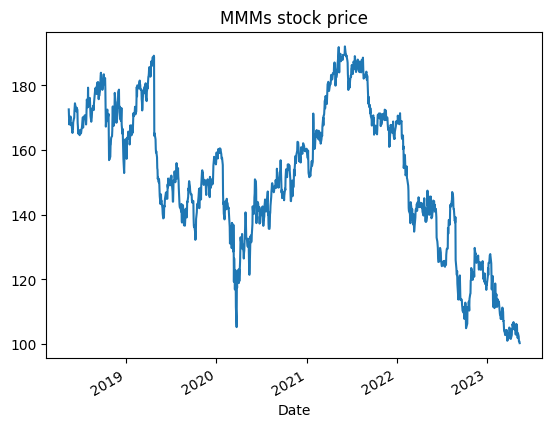

In [11]:
goodCompanies = ['MMM']
for company in goodCompanies[:len(goodCompanies)]:

  ticker = yf.Ticker(company)
  tsla_df = ticker.history(period="5Y")
  print(tsla_df['Close'].plot(title= str(company) + "s stock price"))

print(finalData[goodCompanies].shape)


In [14]:
import plotly.express as px
goodCompanies = ['Date','NFLX','TSLA','DXCM','LLY','TGT','WMT']

df = finalData[goodCompanies]

# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()
# plot interactive chart for stocks data
# plot interactive chart for stocks data
interactive_plot(df, 'Stock Prices')

In [19]:
finalDataEnd = finalData[(finalData['Date'] >= '2020-12-29') & (finalData['Date'] <= '2023-06-10')]


In [20]:
youtubeCompanies = ['Date','TSLA','MAR']
finalDataEnd[youtubeCompanies]

,Date,TSLA,MAR
Date,,,
2021-10-01,2021-10-01,258.406677,154.651886
2021-10-04,2021-10-04,260.510010,153.828888
2021-10-05,2021-10-05,260.196655,154.126358
2021-10-06,2021-10-06,260.916656,153.997467
2021-10-07,2021-10-07,264.536682,156.416855
...,...,...,...
2023-05-08,2023-05-08,171.789993,177.949997
2023-05-09,2023-05-09,169.149994,178.990005
2023-05-10,2023-05-10,168.539993,175.630005


In [22]:
finalVolume=pd.DataFrame()
for company in companies:
  tsla_df = yf.download(company, 
                      start=startDate, 
                      #end=endDate, 
                      progress=False)
  tsla_df = tsla_df.drop(columns=['Open', 'High','Low', 'Close',"Adj Close"])
  tsla_df = tsla_df.rename(columns={'Volume': company})
  tmp = tsla_df[str(company)]

  finalVolume = finalVolume.append(tmp, ignore_index=True)
finalVolume = finalVolume.T # or df2.transpose()
for i in range(len(companies)):
  finalVolume = finalVolume.rename(columns={i: companies[i]})




finalVolume['Date'] = finalVolume.index
col_name="Date"
first_col = finalVolume.pop(col_name)
finalVolume.insert(0, col_name, first_col)
finalVolume.to_csv('/content/drive/MyDrive/YahooData/YahooFinanceVolume.csv', index = False, header=True)
finalVolume

<ipython-input-22-e57206006ced>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-e57206006ced>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-e57206006ced>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-e57206006ced>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-e57206006ced>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-e57206006ced>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us


1 Failed download:
- DRE: No timezone found, symbol may be delisted


<ipython-input-22-e57206006ced>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-e57206006ced>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-e57206006ced>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-e57206006ced>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-e57206006ced>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-e57206006ced>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us


1 Failed download:
- FBHS: No timezone found, symbol may be delisted


<ipython-input-22-e57206006ced>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-e57206006ced>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-e57206006ced>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-e57206006ced>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-e57206006ced>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-e57206006ced>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us


1 Failed download:
- SIVB: No timezone found, symbol may be delisted


<ipython-input-22-e57206006ced>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-e57206006ced>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-e57206006ced>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-e57206006ced>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-e57206006ced>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-e57206006ced>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us


1 Failed download:
- TWTR: No timezone found, symbol may be delisted


<ipython-input-22-e57206006ced>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-e57206006ced>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-e57206006ced>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-e57206006ced>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-e57206006ced>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-e57206006ced>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

,Date,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AAP,...,TSLA,AAPL,XRX,XYL,YUM,ZBRA,ZBH,ZION,ZTS,NFLX
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-01,2021-10-01,2419300.0,1159100.0,8173200.0,8611500.0,141856.0,1802300.0,5861300.0,2915300.0,642400.0,...,51094200.0,94639600.0,2125200.0,1472000.0,1995000.0,534600.0,1426550.0,1270700.0,2095500.0,4090800.0
2021-10-04,2021-10-04,3010100.0,1249800.0,5903500.0,9779200.0,228684.0,1774500.0,5955600.0,3977000.0,568800.0,...,91449900.0,98322000.0,1592400.0,1052200.0,2155600.0,288400.0,1168329.0,1170700.0,1942300.0,4995900.0
2021-10-05,2021-10-05,1888300.0,1839900.0,4238400.0,7146900.0,382603.0,1628800.0,9771000.0,2337800.0,460700.0,...,55297800.0,80861100.0,2000200.0,1056800.0,1660800.0,225900.0,1190577.0,1380400.0,2490200.0,9534300.0
2021-10-06,2021-10-06,2057600.0,1234200.0,5498900.0,5710300.0,209463.0,2166400.0,9477600.0,2043200.0,512600.0,...,43898400.0,83221100.0,1731500.0,623700.0,1723900.0,176500.0,1129807.0,1084600.0,1564600.0,4580400.0
2021-10-07,2021-10-07,2878100.0,1224000.0,4505800.0,7842600.0,193551.0,1188400.0,8527400.0,2648500.0,321400.0,...,57587400.0,61732700.0,1224000.0,701200.0,1535400.0,239200.0,1020524.0,1060700.0,1093400.0,3556900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-08,2023-05-08,2094000.0,530400.0,2445500.0,3689500.0,NaN,1843000.0,4070600.0,3135900.0,868500.0,...,112249400.0,55962800.0,1882600.0,1523300.0,981400.0,384100.0,1304500.0,12038700.0,1976100.0,5488600.0
2023-05-09,2023-05-09,3121400.0,636800.0,3274300.0,4201600.0,NaN,2712000.0,4752600.0,1879400.0,754400.0,...,88965000.0,45326900.0,1344400.0,1452700.0,1094900.0,432900.0,1017600.0,4999300.0,1904200.0,5544900.0
2023-05-10,2023-05-10,2744100.0,679700.0,3129100.0,4127300.0,NaN,2800200.0,7229600.0,3386300.0,751000.0,...,119840700.0,53724500.0,1533800.0,1344700.0,1595200.0,257400.0,1163400.0,5689100.0,1610500.0,4289900.0
